,Subject Number,Subject Name,Valid Votes,Year
1,1,Pirátska strana - Slovensko,9358,2023
2,2,PRINCÍP,1817,2023
3,3,Progresívne Slovensko,533136,2023
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023
...,...,...,...,...
200,14,Slovenská národná strana,155359,1994
201,15,Kresťanskodemokratické hnutie,289987,1994
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994
203,17,Kresťanská sociálna únia Slovenska,59217,1994


C:\Users\janko\AppData\Local\Temp\ipykernel_22140\2266095380.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\2266095380.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\2266095380.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Subject Number,Subject Name,Valid Votes,Year,Total Voters,No Valid Votes,Percentage
1,1,Pirátska strana - Slovensko,9358,2023,4388872,1420976,0.315308
2,2,PRINCÍP,1817,2023,4388872,1420976,0.061222
3,3,Progresívne Slovensko,533136,2023,4388872,1420976,17.963433
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023,4388872,1420976,0.080899
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023,4388872,1420976,8.899806
...,...,...,...,...,...,...,...
200,14,Slovenská národná strana,155359,1994,3876555,1001097,5.402931
201,15,Kresťanskodemokratické hnutie,289987,1994,3876555,1001097,10.084898
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994,3876555,1001097,34.967925
203,17,Kresťanská sociálna únia Slovenska,59217,1994,3876555,1001097,2.059394


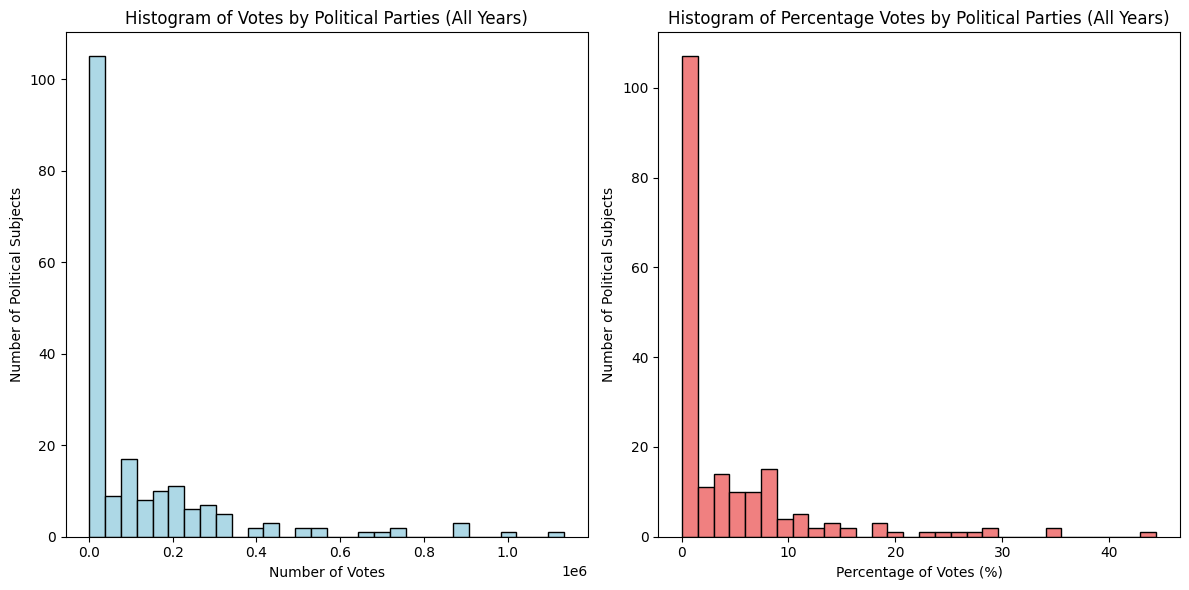

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

display(filtered_data)

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100
    display(df)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram of votes
    axes[0].hist(df["Valid Votes"], bins=30, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Number of Political Subjects')
    axes[0].set_title('Histogram of Votes by Subjects (All Years)')
    
    # Plot histogram of percentages
    axes[1].hist(df["Percentage"], bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Number of Political Subjects')
    axes[1].set_title('Histogram of Percentage Votes by Subjects (All Years)')
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


,Subject Number,Subject Name,Valid Votes,Year
1,1,Pirátska strana - Slovensko,9358,2023
2,2,PRINCÍP,1817,2023
3,3,Progresívne Slovensko,533136,2023
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023
...,...,...,...,...
200,14,Slovenská národná strana,155359,1994
201,15,Kresťanskodemokratické hnutie,289987,1994
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994
203,17,Kresťanská sociálna únia Slovenska,59217,1994


C:\Users\janko\AppData\Local\Temp\ipykernel_22140\892584365.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\892584365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\892584365.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Subject Number,Subject Name,Valid Votes,Year,Total Voters,No Valid Votes,Percentage
1,1,Pirátska strana - Slovensko,9358,2023,4388872,1420976,0.315308
2,2,PRINCÍP,1817,2023,4388872,1420976,0.061222
3,3,Progresívne Slovensko,533136,2023,4388872,1420976,17.963433
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023,4388872,1420976,0.080899
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023,4388872,1420976,8.899806
...,...,...,...,...,...,...,...
200,14,Slovenská národná strana,155359,1994,3876555,1001097,5.402931
201,15,Kresťanskodemokratické hnutie,289987,1994,3876555,1001097,10.084898
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994,3876555,1001097,34.967925
203,17,Kresťanská sociálna únia Slovenska,59217,1994,3876555,1001097,2.059394


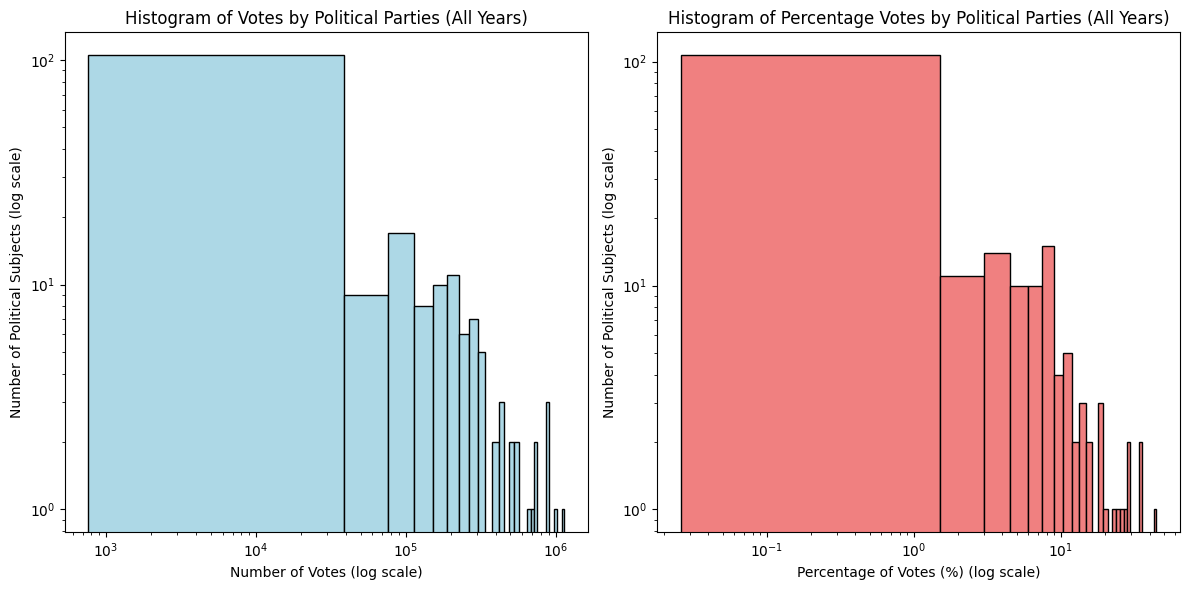

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

display(filtered_data)

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100
    display(df)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram of votes with log scale
    axes[0].hist(df["Valid Votes"], bins=30, color='lightblue', edgecolor='black', log=True)
    axes[0].set_xlabel('Number of Votes (log scale)')
    axes[0].set_ylabel('Number of Political Subjects (log scale)')
    axes[0].set_title('Histogram of Votes by Political Parties (All Years)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    # Plot histogram of percentages with log scale
    axes[1].hist(df["Percentage"], bins=30, color='lightcoral', edgecolor='black', log=True)
    axes[1].set_xlabel('Percentage of Votes (%) (log scale)')
    axes[1].set_ylabel('Number of Political Subjects (log scale)')
    axes[1].set_title('Histogram of Percentage Votes by Political Parties (All Years)')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


,Subject Number,Subject Name,Valid Votes,Year
1,1,Pirátska strana - Slovensko,9358,2023
2,2,PRINCÍP,1817,2023
3,3,Progresívne Slovensko,533136,2023
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023
...,...,...,...,...
200,14,Slovenská národná strana,155359,1994
201,15,Kresťanskodemokratické hnutie,289987,1994
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994
203,17,Kresťanská sociálna únia Slovenska,59217,1994


C:\Users\janko\AppData\Local\Temp\ipykernel_22140\355629295.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\355629295.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\355629295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Subject Number,Subject Name,Valid Votes,Year,Total Voters,No Valid Votes,Percentage
1,1,Pirátska strana - Slovensko,9358,2023,4388872,1420976,0.315308
2,2,PRINCÍP,1817,2023,4388872,1420976,0.061222
3,3,Progresívne Slovensko,533136,2023,4388872,1420976,17.963433
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023,4388872,1420976,0.080899
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023,4388872,1420976,8.899806
...,...,...,...,...,...,...,...
200,14,Slovenská národná strana,155359,1994,3876555,1001097,5.402931
201,15,Kresťanskodemokratické hnutie,289987,1994,3876555,1001097,10.084898
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994,3876555,1001097,34.967925
203,17,Kresťanská sociálna únia Slovenska,59217,1994,3876555,1001097,2.059394


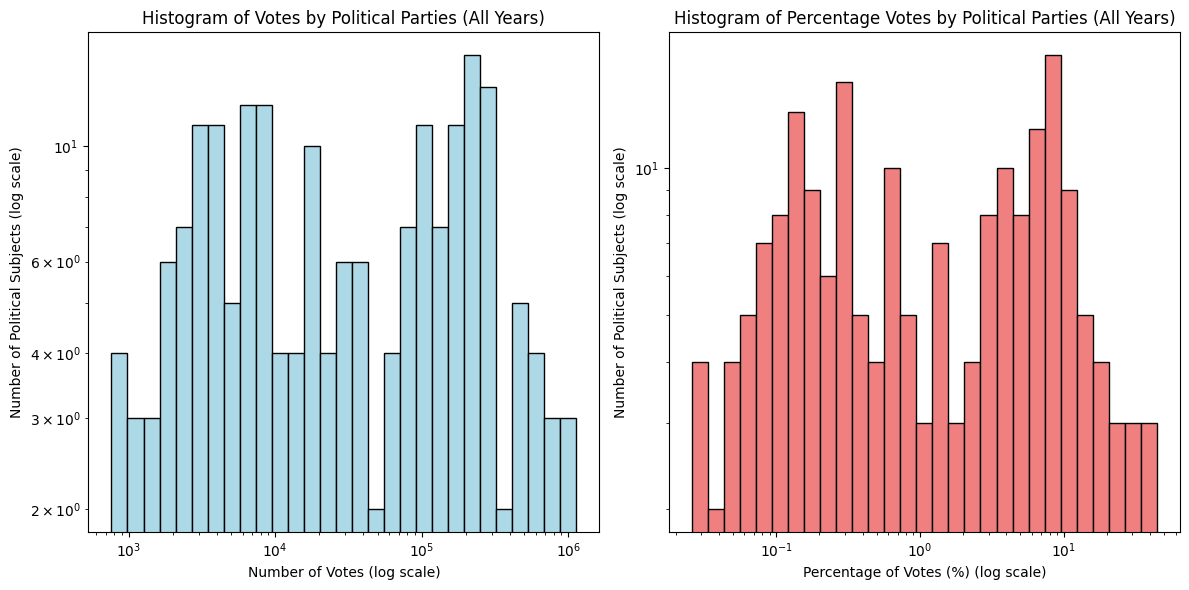

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

display(filtered_data)

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100
    display(df)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Generate logarithmic bins for votes
    valid_votes_min, valid_votes_max = df["Valid Votes"].min(), df["Valid Votes"].max()
    votes_bins = np.logspace(np.log10(valid_votes_min), np.log10(valid_votes_max), 30)
    
    # Plot histogram of votes with log scale and equal-width bins
    axes[0].hist(df["Valid Votes"], bins=votes_bins, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes (log scale)')
    axes[0].set_ylabel('Number of Political Subjects (log scale)')
    axes[0].set_title('Histogram of Votes by Political Parties (All Years)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    # Generate logarithmic bins for percentages
    percentage_min, percentage_max = df["Percentage"].min(), df["Percentage"].max()
    percentage_bins = np.logspace(np.log10(percentage_min), np.log10(percentage_max), 30)
    
    # Plot histogram of percentages with log scale and equal-width bins
    axes[1].hist(df["Percentage"], bins=percentage_bins, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%) (log scale)')
    axes[1].set_ylabel('Number of Political Subjects (log scale)')
    axes[1].set_title('Histogram of Percentage Votes by Political Parties (All Years)')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


,Subject Number,Subject Name,Valid Votes,Year
1,1,Pirátska strana - Slovensko,9358,2023
2,2,PRINCÍP,1817,2023
3,3,Progresívne Slovensko,533136,2023
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023
...,...,...,...,...
200,14,Slovenská národná strana,155359,1994
201,15,Kresťanskodemokratické hnutie,289987,1994
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994
203,17,Kresťanská sociálna únia Slovenska,59217,1994


C:\Users\janko\AppData\Local\Temp\ipykernel_22140\3758680730.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\3758680730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_22140\3758680730.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Subject Number,Subject Name,Valid Votes,Year,Total Voters,No Valid Votes,Percentage
1,1,Pirátska strana - Slovensko,9358,2023,4388872,1420976,0.315308
2,2,PRINCÍP,1817,2023,4388872,1420976,0.061222
3,3,Progresívne Slovensko,533136,2023,4388872,1420976,17.963433
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023,4388872,1420976,0.080899
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023,4388872,1420976,8.899806
...,...,...,...,...,...,...,...
200,14,Slovenská národná strana,155359,1994,3876555,1001097,5.402931
201,15,Kresťanskodemokratické hnutie,289987,1994,3876555,1001097,10.084898
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994,3876555,1001097,34.967925
203,17,Kresťanská sociálna únia Slovenska,59217,1994,3876555,1001097,2.059394


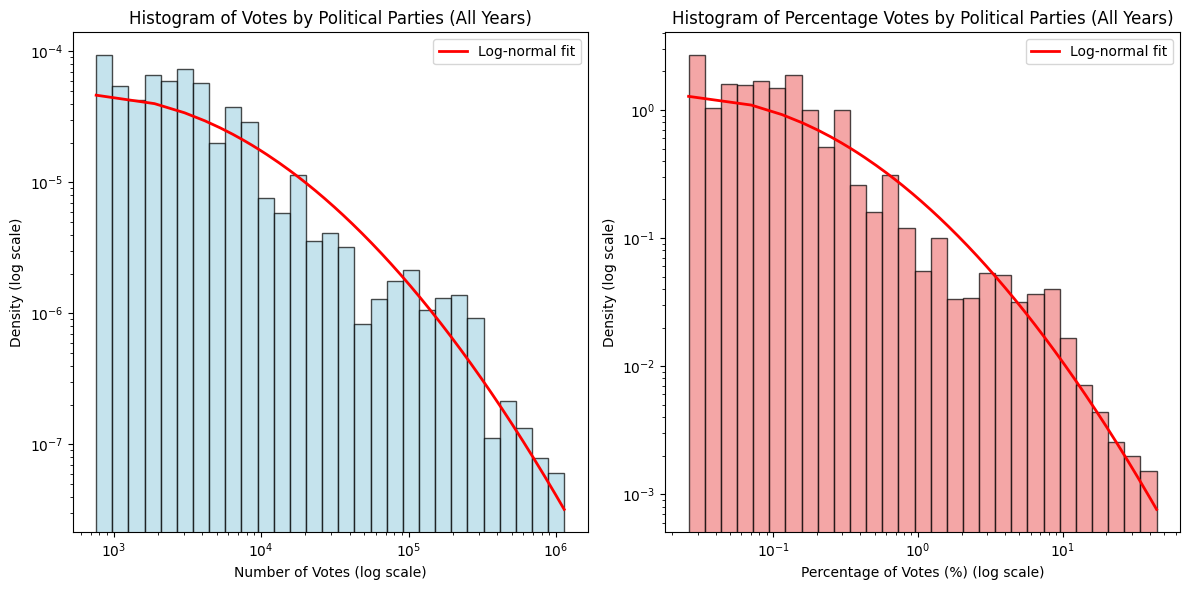

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from IPython.display import display
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

display(filtered_data)

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100
    display(df)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Generate logarithmic bins for votes
    valid_votes_min, valid_votes_max = df["Valid Votes"].min(), df["Valid Votes"].max()
    votes_bins = np.logspace(np.log10(valid_votes_min), np.log10(valid_votes_max), 30)
    
    # Plot histogram of votes with log scale and equal-width bins
    axes[0].hist(df["Valid Votes"], bins=votes_bins, color='lightblue', edgecolor='black', alpha=0.7, density=True)
    
    # Fit a log-normal distribution to the votes data
    shape, loc, scale = lognorm.fit(df["Valid Votes"], floc=0)
    x = np.linspace(valid_votes_min, valid_votes_max, 1000)
    pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
    axes[0].plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
    
    axes[0].set_xlabel('Number of Votes (log scale)')
    axes[0].set_ylabel('Density (log scale)')
    axes[0].set_title('Histogram of Votes by Political Parties (All Years)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].legend()

    # Generate logarithmic bins for percentages
    percentage_min, percentage_max = df["Percentage"].min(), df["Percentage"].max()
    percentage_bins = np.logspace(np.log10(percentage_min), np.log10(percentage_max), 30)
    
    # Plot histogram of percentages with log scale and equal-width bins
    axes[1].hist(df["Percentage"], bins=percentage_bins, color='lightcoral', edgecolor='black', alpha=0.7, density=True)
    
    # Fit a log-normal distribution to the percentage data
    shape, loc, scale = lognorm.fit(df["Percentage"], floc=0)
    x = np.linspace(percentage_min, percentage_max, 1000)
    pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
    axes[1].plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
    
    axes[1].set_xlabel('Percentage of Votes (%) (log scale)')
    axes[1].set_ylabel('Density (log scale)')
    axes[1].set_title('Histogram of Percentage Votes by Political Parties (All Years)')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


,Subject Number,Subject Name,Valid Votes,Year
1,1,Pirátska strana - Slovensko,9358,2023
2,2,PRINCÍP,1817,2023
3,3,Progresívne Slovensko,533136,2023
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023
...,...,...,...,...
200,14,Slovenská národná strana,155359,1994
201,15,Kresťanskodemokratické hnutie,289987,1994
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994
203,17,Kresťanská sociálna únia Slovenska,59217,1994


C:\Users\janko\AppData\Local\Temp\ipykernel_21560\3833293718.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_21560\3833293718.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_21560\3833293718.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Subject Number,Subject Name,Valid Votes,Year,Total Voters,No Valid Votes,Percentage
1,1,Pirátska strana - Slovensko,9358,2023,4388872,1420976,0.315308
2,2,PRINCÍP,1817,2023,4388872,1420976,0.061222
3,3,Progresívne Slovensko,533136,2023,4388872,1420976,17.963433
4,4,SPOLOČNE OBČANIA SLOVENSKA,2401,2023,4388872,1420976,0.080899
5,5,"OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZ...",264137,2023,4388872,1420976,8.899806
...,...,...,...,...,...,...,...
200,14,Slovenská národná strana,155359,1994,3876555,1001097,5.402931
201,15,Kresťanskodemokratické hnutie,289987,1994,3876555,1001097,10.084898
202,16,Hnutie za demokratické Slovensko a Roľnícka st...,1005488,1994,3876555,1001097,34.967925
203,17,Kresťanská sociálna únia Slovenska,59217,1994,3876555,1001097,2.059394


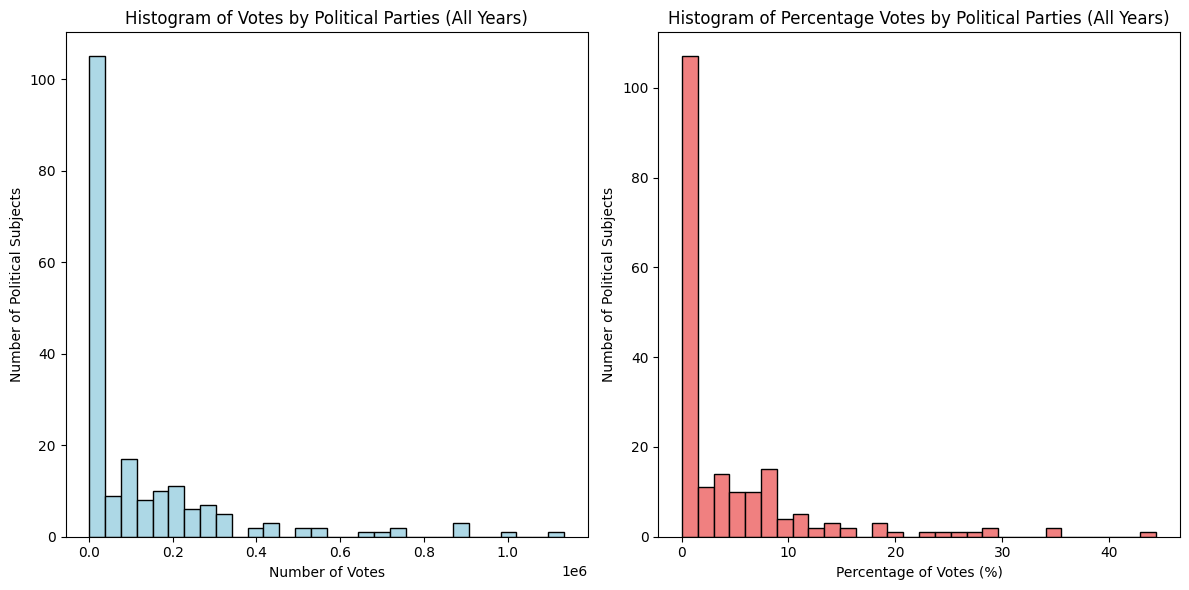

Testing power law for valid votes:
Calculating best minimal value for power law fit


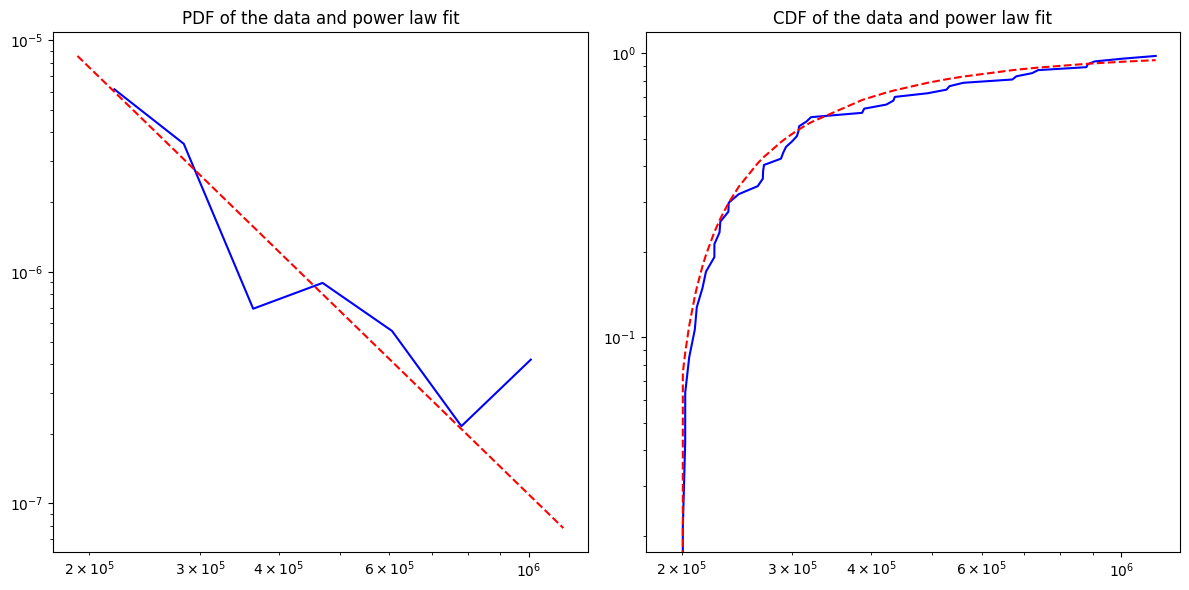

Log-likelihood ratio: -0.03266088584022597, p-value: 0.9889062949161802
Testing power law for percentages:
Calculating best minimal value for power law fit


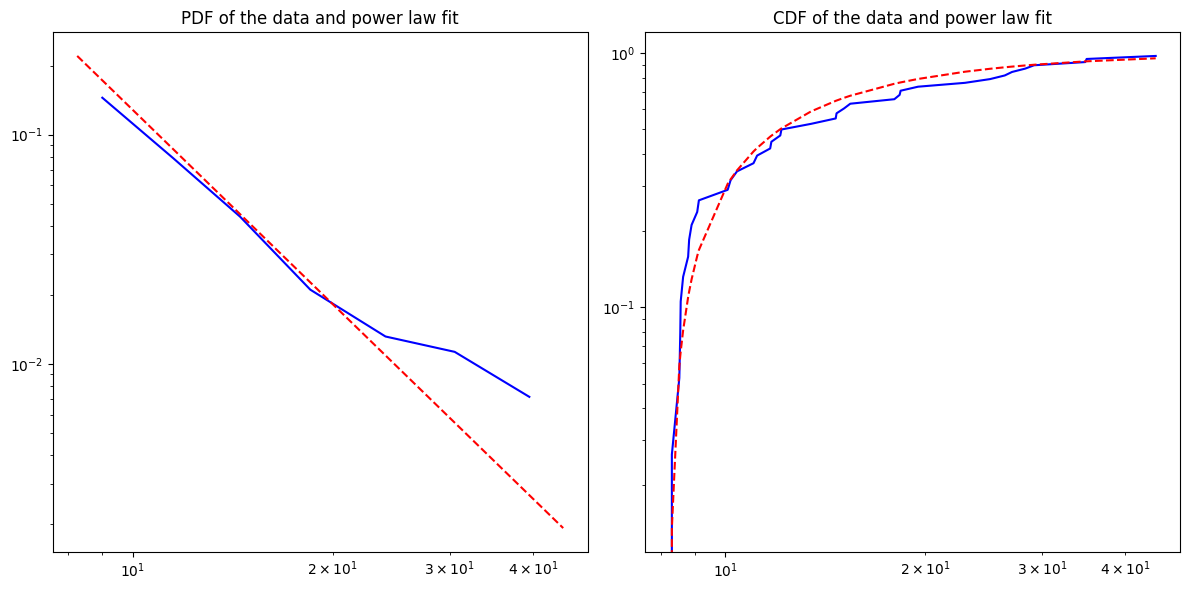

Log-likelihood ratio: 0.46713347058880084, p-value: 0.8339634456580058


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import powerlaw
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

display(filtered_data)

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100
    display(df)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram of votes
    axes[0].hist(df["Valid Votes"], bins=30, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Number of Political Subjects')
    axes[0].set_title('Histogram of Votes by Political Parties (All Years)')
    
    # Plot histogram of percentages
    axes[1].hist(df["Percentage"], bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Number of Political Subjects')
    axes[1].set_title('Histogram of Percentage Votes by Political Parties (All Years)')
    
    plt.tight_layout()
    plt.show()

    return df["Valid Votes"], df["Percentage"]

# Function to test power law distribution
def test_power_law(data):
    fit = powerlaw.Fit(data)
    fig = plt.figure(figsize=(12, 6))
    
    # Plot the PDF and the fit
    ax = fig.add_subplot(121)
    fit.plot_pdf(color='b', ax=ax)
    fit.power_law.plot_pdf(color='r', linestyle='--', ax=ax)
    ax.set_title("PDF of the data and power law fit")

    # Plot the CDF and the fit
    ax = fig.add_subplot(122)
    fit.plot_cdf(color='b', ax=ax)
    fit.power_law.plot_cdf(color='r', linestyle='--', ax=ax)
    ax.set_title("CDF of the data and power law fit")
    
    plt.tight_layout()
    plt.show()
    
    R, p = fit.distribution_compare('power_law', 'exponential')
    print(f"Log-likelihood ratio: {R}, p-value: {p}")
    
    return fit

# Plot the histograms for the filtered data
valid_votes, percentages = plot_histograms(filtered_data)

# Test for power law distribution in the number of valid votes
print("Testing power law for valid votes:")
fit_valid_votes = test_power_law(valid_votes)

# Test for power law distribution in the percentages
print("Testing power law for percentages:")
fit_percentages = test_power_law(percentages)
